<a href="https://colab.research.google.com/github/o-bissing/TF_Udemy/blob/main/CNN_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

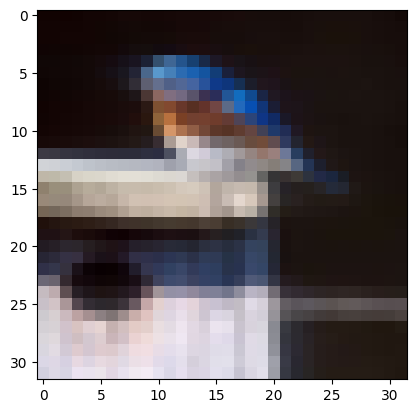

In [12]:
plt.imshow(x_train[13])

In [13]:
x_train[0].max()

255

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

# Building the model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4859 - accuracy: 0.4634 - val_loss: 1.2803 - val_accuracy: 0.5401
Epoch 2/15
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1616 - accuracy: 0.5914 - val_loss: 1.1072 - val_accuracy: 0.6126
Epoch 3/15
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0201 - accuracy: 0.6415 - val_loss: 1.0236 - val_accuracy: 0.6374
Epoch 4/15
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9157 - accuracy: 0.6797 - val_loss: 1.0031 - val_accuracy: 0.6498
Epoch 5/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8295 - accuracy: 0.7082 - val_loss: 0.9474 - val_accuracy: 0.6727
Epoch 6/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7530 - accuracy: 0.7374 - val_loss: 0.9605 - val_accuracy: 0.6701
Epoch 7/15
1563/1563 [==============================] - 92s 59ms/step - loss: 0.6740 - accuracy: 0.7648 - val_loss: 0.9567 -

# Model evaluation

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics

In [ ]:
metrics.columns

In [ ]:
metrics[['accuracy','val_accuracy']]